<font color='blue' size=6><b>Demo - Week 9 Worksheet Suggested Solutions</b></font>

In [64]:
###install.packages("ggpubr")
library("ggpubr")

In [65]:
###install.packages('ppcor',repos='https://cran.ma.imperial.ac.uk/')
library(ppcor)

In [5]:
library(dplyr)

<font color='blue' size=5><b> Suggested solutions to Part 1 (datafile essaymarks) </b></font>

In [30]:
essaymarks <- read.table(file="../Data/essaymarks.txt",sep=',',header = T)

<font color='blue' size=3>A student was interested in whether there was a positive relationship between the time spent
doing an essay and the mark received. The student recruited 45 of his friends and recorded the
time spent writing an essay (hours) against the mark awarded (essay).</font>

In [31]:
head(essaymarks) ### the column "grade" is not useful in this question as we know what grade it is from column "essay"

essay,hours,grade
<dbl>,<dbl>,<fct>
61.67550,10.630337,Upper-Second-Class
69.54501,7.285226,First-Class
48.22930,5.052048,Third-Class
70.67865,2.886614,First-Class
59.89962,9.545012,Lower-Second-Class
61.16202,11.310838,Upper-Second-Class


<font color='blue' size=3>Question 1: Draw a scatterplot of these data. </font>

In [39]:
hours <- essaymarks$hours
mark <- essaymarks$essay

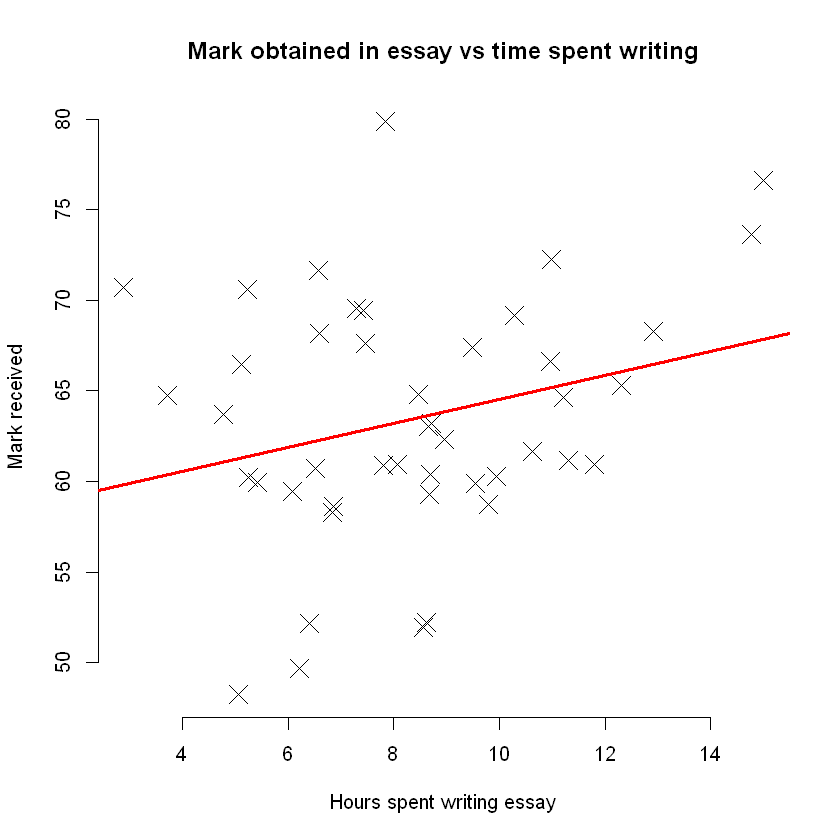

In [72]:
options(repr.plot.width=7, repr.plot.height=7)

plot(hours, mark, main = "Mark obtained in essay vs time spent writing",
     xlab = "Hours spent writing essay", ylab = "Mark received",
     pch = 4, cex = 2, frame = FALSE)

plot(hours, mark, main = "Mark obtained in essay vs time spent writing",
     xlab = "Hours spent writing essay", ylab = "Mark received",
     pch = 4, cex = 2, frame = FALSE)

abline(lm(mark ~ hours, data = essaymarks), col = "red", lwd=3)

<font color='blue' size=3>Question 2: Test for normality. </font>

In [47]:
? shapiro.test

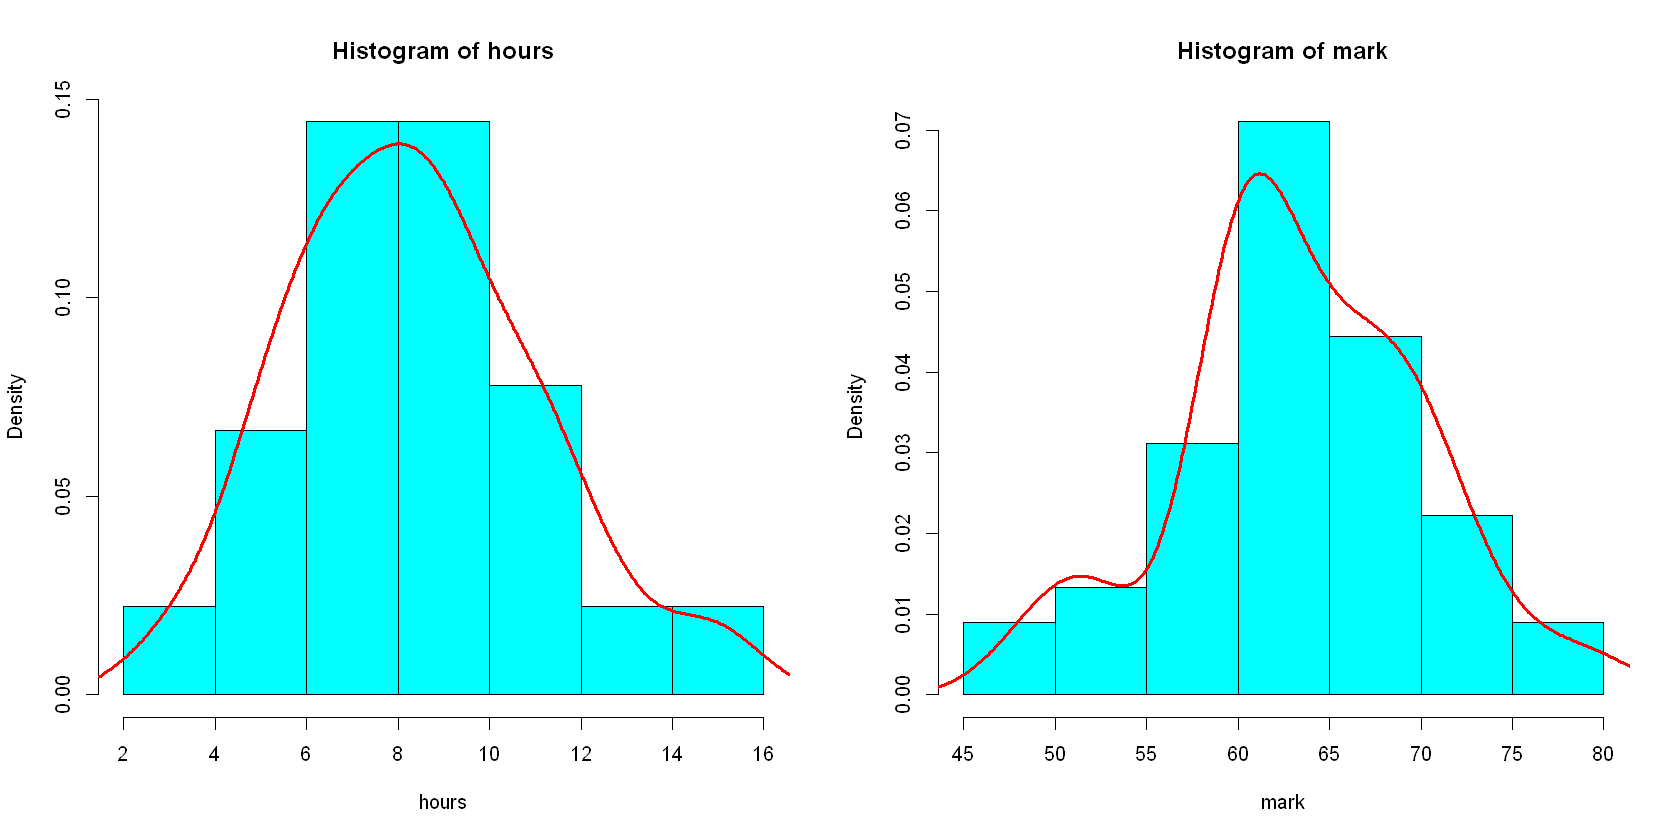

In [51]:
options(repr.plot.width=14, repr.plot.height=7)

par(mfrow=c(1,2))
hist(hours, col='cyan', freq=F)
lines(density(hours), co='red', lwd=3)

hist(mark, col='cyan', freq=F)
lines(density(mark), co='red', lwd=3)

<font color='green' size=3>
Shapiro-Wilk test can be performed as follow: <br>
Null hypothesis: the data are normally distributed <br>
Alternative hypothesis: the data are not normally distributed

In [48]:
shapiro.test(hours)


	Shapiro-Wilk normality test

data:  hours
W = 0.98103, p-value = 0.6615


In [50]:
shapiro.test(mark)


	Shapiro-Wilk normality test

data:  mark
W = 0.97739, p-value = 0.5177


<font color='green' size=3>
From the output, the two p-values are greater than the significance level 0.05 implying that the distribution of the data are not significantly different from normal distribution. In other words, we can assume the normality.

<font color='green' size=3> We can also perform a visual inspection of the data normality

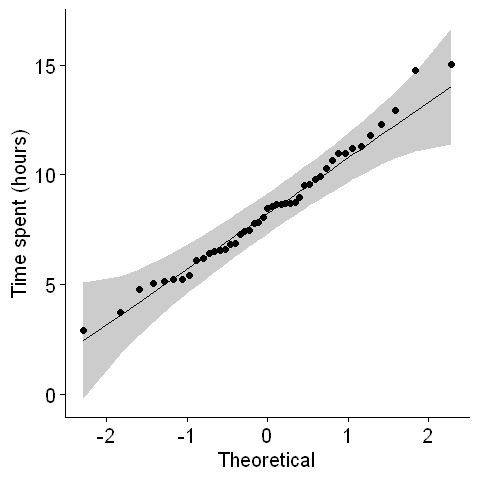

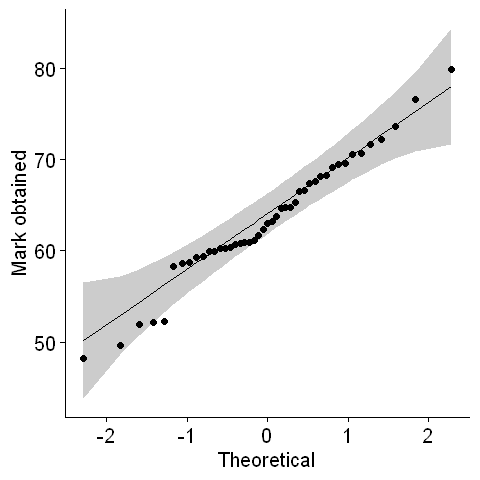

In [103]:
options(repr.plot.width=4, repr.plot.height=4)

ggqqplot(essaymarks$hours, ylab = "Time spent (hours)")
ggqqplot(essaymarks$essay, ylab = "Mark obtained")

<font color='green' size=3>  From the normality plots, we conclude that both populations may come from normal distributions. <br>
(Note that, if the data are not normally distributed, it’s recommended to use the non-parametric correlation, including Spearman and Kendall rank-based correlation tests.)

<font color='blue' size=3>Question 3: Compute the sample correlation </font>

In [55]:
? cor.test

In [54]:
cor.test(hours,mark)


	Pearson's product-moment correlation

data:  hours and mark
t = 1.8145, df = 43, p-value = 0.07659
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02913052  0.51954713
sample estimates:
      cor 
0.2666837 


<font color='blue' size=3>Question 4: Decide whether there is significant correlation.</font>

<font color='green' size=3> The p-value of the test is 0.076, which is less than the significance level alpha = 0.1. We can conclude that hours and marks are significantly correlated with a correlation coefficient of 0.266. <br> 
However, at a significance level alpha = 0.05 we cannot say that the data is significantly correlated.

<font color='blue' size=5><b> Suggested solutions to Part 2 (datafile distance) </b></font>

In [161]:
distance_data <- read.table(file="../Data/distance.txt",sep=',',header = T)

<font color='blue' size=3>Question: Is there a positive relationship between the year and how far each person in the UK drives?</font>

In [162]:
year <- distance_data$Year
distance <- distance_data$Distance

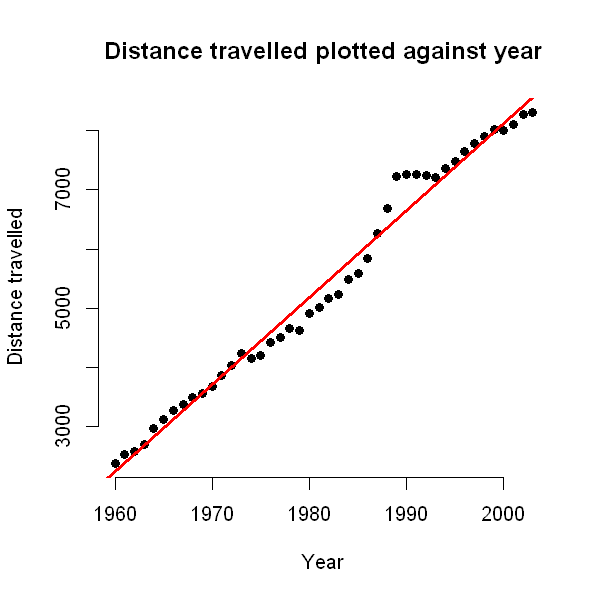

In [163]:
options(repr.plot.width=5, repr.plot.height=5)

plot(year, distance, main = "Distance travelled plotted against year",
     xlab = "Year", ylab = "Distance travelled",
     pch = 19, cex = 1, frame = FALSE)

plot(year, distance, main = "Distance travelled plotted against year",
     xlab = "Year", ylab = "Distance travelled",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(distance ~ year, data = distance_data), col = "red", lwd=3)

In [164]:
shapiro.test(year)


	Shapiro-Wilk normality test

data:  year
W = 0.95591, p-value = 0.09149


In [165]:
shapiro.test(distance)


	Shapiro-Wilk normality test

data:  distance
W = 0.92125, p-value = 0.005243


<font color='green' size=3>
From the output, the second p-value is less than the significance level 0.05 implying that the data does not follow a normal distribution. We will theorefore use Spearman’s correlation coefficient to test for correlation. 

In [166]:
cor.test(distance, year,  method = "spearman")


	Spearman's rank correlation rho

data:  distance and year
S = 38, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9973221 


<font color='green' size=3>
The correlation coefficient between year and distance is 0.997 and the p-value is 2.2e^{-16}. <br> 
We can therefore conclude that we have a very strong positive correlation between the year and how far each person in the UK drives.

<font color='blue' size=5><b> Suggested solutions to Part 3 (datafile sorprate) </b></font>

In [120]:
timeofday <- read.table(file="../Data/timeofday.txt",sep=',',header = T)

<font color='blue' size=3>Question: Is there a positive relationship between the hour of the day and proximity?</font>

In [117]:
hour <- timeofday$Hour
prox <- timeofday$Proximity

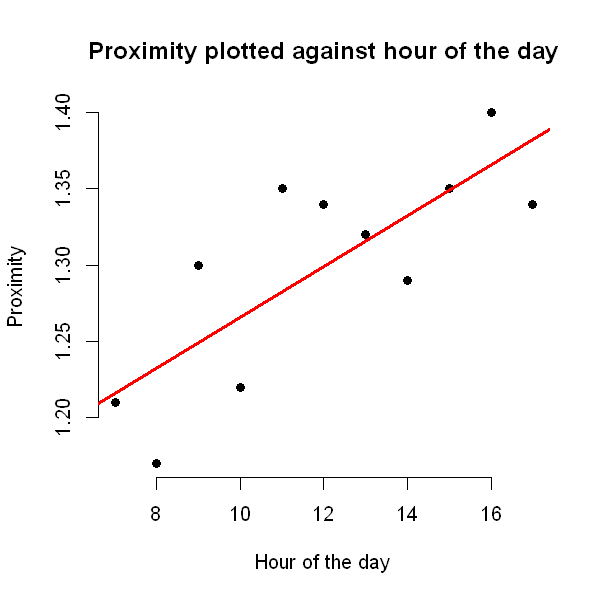

In [119]:
options(repr.plot.width=5, repr.plot.height=5)

plot(hour, prox, main = "Proximity plotted against hour of the day",
     xlab = "Hour of the day", ylab = "Proximity",
     pch = 19, cex = 1, frame = FALSE)

plot(hour, prox, main = "Proximity plotted against hour of the day",
     xlab = "Hour of the day", ylab = "Proximity",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(prox ~ hour, data = timeofday), col = "red", lwd=3)

In [121]:
shapiro.test(hour)
shapiro.test(prox)


	Shapiro-Wilk normality test

data:  hour
W = 0.96839, p-value = 0.8698



	Shapiro-Wilk normality test

data:  prox
W = 0.91898, p-value = 0.3103


<font color='green' size=3>
From the output, the two p-values are greater than the significance level 0.05. Hence, we can assume the normality and use the Pearson test.

In [123]:
cor.test(prox, hour,  method = "pearson")


	Pearson's product-moment correlation

data:  prox and hour
t = 3.7345, df = 9, p-value = 0.004665
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3376288 0.9399148
sample estimates:
      cor 
0.7796062 


<font color='green' size=3>
The correlation coefficient between hour of day and proximity is 0.779 and the p-value is 0.005. <br> 
We can therefore conclude that we have a strong positive correlation between the year and how far each person in the UK drives.

<font color='blue' size=5><b> Suggested solutions to Part 4 (datafile eutax) </b></font>

In [125]:
eutax <- read.table(file="../Data/eutax.txt",sep=',',header = T) 

<font color='blue' size=3> Question: Is there a relationship between the year and the level of tax levied across the European Union? </font>

In [124]:
year <- eutax$Year
tax <- eutax$Tax

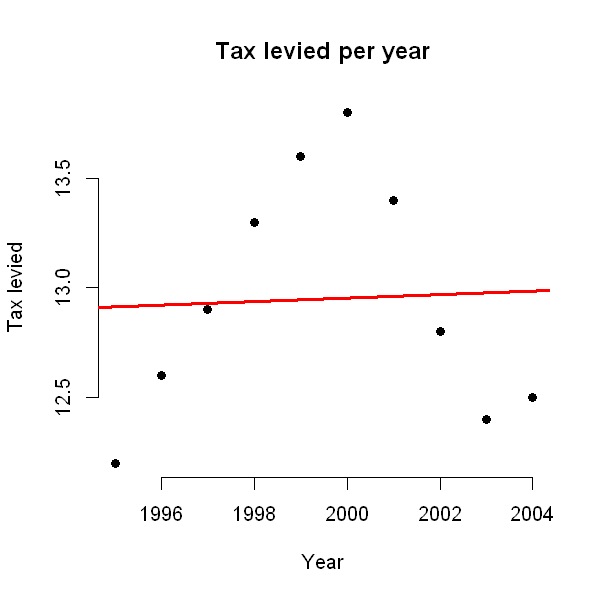

In [134]:
options(repr.plot.width=5, repr.plot.height=5)

plot(year, tax, main = "Tax levied per year",
     xlab = "Year", ylab = "Tax levied",
     pch = 19, cex = 1, frame = FALSE)

plot(year, tax, main = "Tax levied per year",
     xlab = "Year", ylab = "Tax levied",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(tax ~ year, data = eutax), col = "red", lwd=3)

In [128]:
shapiro.test(year)
shapiro.test(tax)


	Shapiro-Wilk normality test

data:  year
W = 0.97016, p-value = 0.8924



	Shapiro-Wilk normality test

data:  tax
W = 0.94819, p-value = 0.6471


<font color='green' size=3>
From the output, the two p-values are greater than the significance level 0.05. Hence, we can assume the normality and use the Pearson test.

In [129]:
cor.test(tax, year,  method = "pearson")


	Pearson's product-moment correlation

data:  tax and year
t = 0.12364, df = 8, p-value = 0.9046
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6025212  0.6552807
sample estimates:
       cor 
0.04367312 


<font color='green' size=3>
The correlation coefficient between hour of day and proximity is 0.04 and the p-value is 0.904. <br> 
We then conlcude that there is not a significant correlation between the year and the tax levied. 

<font color='blue' size=5><b> Suggested solutions to Part 5 (datafile temprate) </b></font>

In [132]:
temprate<-read.table(file="../Data/temprate.txt",sep=',',header = T)

<font color='blue' size=3> Question: Is there a positive relationship between body temperature and heart rate? </font>

In [133]:
temp <- temprate$temp
hrtrate <- temprate$hrtrate

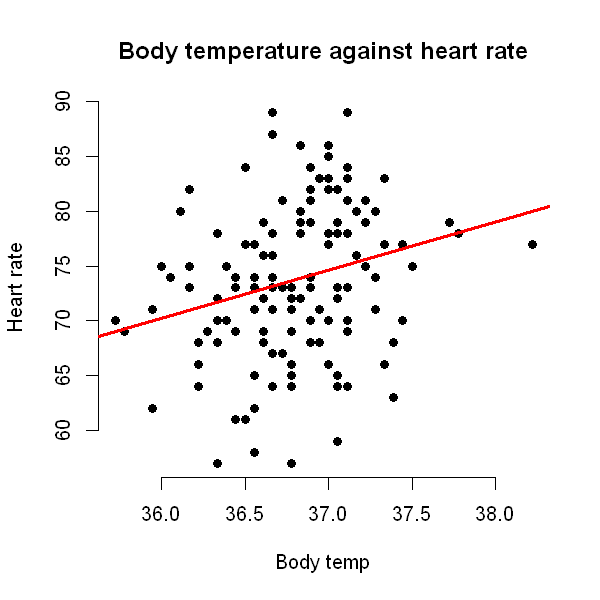

In [136]:
options(repr.plot.width=5, repr.plot.height=5)

plot(temp, hrtrate, main = "Body temperature against heart rate",
     xlab = "Body temp", ylab = "Heart rate",
     pch = 19, cex = 1, frame = FALSE)

plot(temp, hrtrate, main = "Body temperature against heart rate",
     xlab = "Body temp", ylab = "Heart rate",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(hrtrate ~ temp, data = temprate), col = "red", lwd=3)

In [137]:
shapiro.test(temp)
shapiro.test(hrtrate)


	Shapiro-Wilk normality test

data:  temp
W = 0.98658, p-value = 0.2332



	Shapiro-Wilk normality test

data:  hrtrate
W = 0.98854, p-value = 0.355


In [138]:
cor.test(hrtrate, temp)


	Pearson's product-moment correlation

data:  hrtrate and temp
t = 2.9668, df = 128, p-value = 0.003591
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08519113 0.40802170
sample estimates:
      cor 
0.2536564 


<font color='green' size=3>
The correlation coefficient between hour of day and proximity is 0.25 and the p-value is 0.0035. <br> 
We then conlcude that there is a significant positive correlation between heart rate and body temp. 

<font color='blue' size=5><b> Suggested solutions to Part 6 (datafile childdata) </b></font>

In [145]:
childdata <- read.table(file="../Data/childdata.txt",sep=',',header = T)

<font color='blue' size=3> Question: The file contains age, memory span, IQ and reading score for a group of children.
Investigate the relationship between memory span and reading ability. </font>

In [144]:
mem <- childdata$MEM_SPAN
read <- childdata$READ_AB

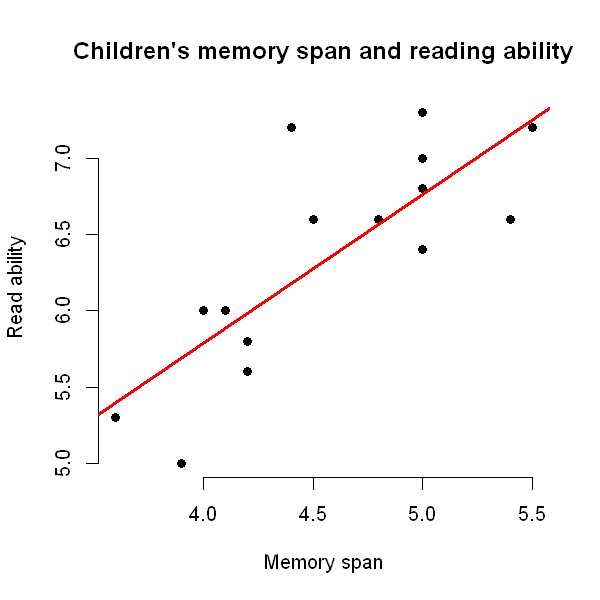

In [150]:
options(repr.plot.width=5, repr.plot.height=5)

plot(mem, read, main = "Children's memory span and reading ability",
     xlab = "Memory span", ylab = "Read ability",
     pch = 19, cex = 1, frame = FALSE)

plot(mem, read, main = "Children's memory span and reading ability",
     xlab = "Memory span", ylab = "Read ability",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(read ~ mem, data = childdata), col = "red", lwd=3)

In [151]:
shapiro.test(mem)
shapiro.test(read)


	Shapiro-Wilk normality test

data:  mem
W = 0.91551, p-value = 0.08122



	Shapiro-Wilk normality test

data:  read
W = 0.94495, p-value = 0.2969


In [152]:
cor.test(read, mem)


	Pearson's product-moment correlation

data:  read and mem
t = 6.0902, df = 18, p-value = 9.374e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5935121 0.9265998
sample estimates:
      cor 
0.8205282 


<font color='green' size=3>
The correlation coefficient between hour of day and proximity is 0.82 and the p-value is 9.374e-06. <br> 
We then conlcude that there is a strong positive correlation between memory and reading ability in children. 

<font color='blue' size=5><b> Suggested solutions to Part 7 (datafile shoppostage) </b></font>

In [153]:
shoppostage<-read.table(file="../Data/shoppostage.txt",sep=',',header = T) 

goods,total,packing
<int>,<int>,<int>
380,631,251
100,194,94
235,418,183
90,183,93
70,200,130
800,1105,305
100,141,41
210,494,284
80,174,94


<font color='blue' size=3> Question: The file contains data on the weight of parcels from a shop.
Investigate the relationship between the weight of packaging and the total weight of the goods
when packed.</font>

In [154]:
total <- shoppostage$total
packing <- shoppostage$packing

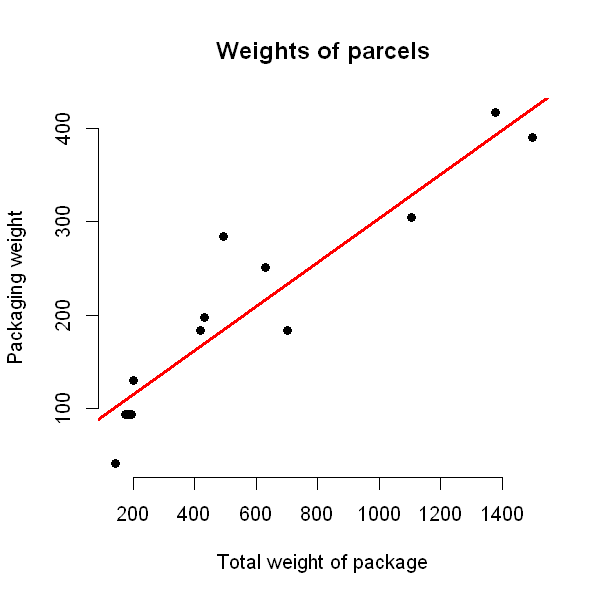

In [157]:
options(repr.plot.width=5, repr.plot.height=5)

plot(total, packing, main = "Weights of parcels",
     xlab = "Total weight of package", ylab = "Packaging weight",
     pch = 19, cex = 1, frame = FALSE)

plot(total, packing, main = "Weights of parcels",
     xlab = "Total weight of package", ylab = "Packaging weight",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(packing ~ total, data = shoppostage), col = "red", lwd=3)

In [159]:
shapiro.test(total)
shapiro.test(packing)


	Shapiro-Wilk normality test

data:  total
W = 0.84006, p-value = 0.02123



	Shapiro-Wilk normality test

data:  packing
W = 0.93965, p-value = 0.4523


<font color='green' size=3>
From the output, the first p-value is less than the significance level 0.05 implying that the data does not follow a normal distribution. We will theorefore use Spearman’s correlation coefficient to test for correlation. 

In [169]:
cor.test(packing, total,  method = "spearman")

Warning message in cor.test.default(packing, total, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  packing and total
S = 23.062, p-value = 2.42e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9366427 


<font color='green' size=3>
If you have two identical values in your data, these are called ties. If there are just a few ties, you should not worry as it wont change our result by much. It is a warning, not an error message. <br>
    
The correlation coefficient between hour of day and proximity is 0.93 and the p-value is 2.42e-06. <br> 
We then conlcude that there is a strong positive correlation between the weight of packing and the total weight of a parcel. 

<font color='blue' size=5><b> Suggested solutions to Part 8 (datafile bloodpressure) </b></font>

In [1]:
bloodpressure <- read.table(file="../Data/bloodpressure.txt",sep=',',header = T)
head(bloodpressure)

idnum,GENDER,SMOKE,AGE,SYS1,DIA1,HR1,WEIGHT
<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,female,non-smoker,19,118,69,70,135
2,male,non-smoker,23,138,74,78,155
3,male,non-smoker,23,160,84,61,197
4,female,non-smoker,19,118,71,70,140
5,female,heavy-smoker,20,162,103,89,122
6,male,non-smoker,20,173,102,79,200


<font color='blue' size=3> Question: The file lists gender, smoking status, age, systolic blood pressure, diastolic blood pressure, heart rate and weight. Investigate all relationships, and in particular the relationship between weight and heart rate when we statistically control for smoking.</font>

In [6]:
 bp <- within(bloodpressure,{SMOKE=as.character(SMOKE)}) 
 bp$smokenum[bp$SMOKE=="non-smoker"]<-"1" 
 bp$smokenum[bp$SMOKE=="light-smoker"]<-"2" 
 bp$smokenum[bp$SMOKE=="heavy-smoker"]<-"3" 
bp$smokenum<-as.numeric(bp$smokenum) 

In [7]:
bp_3cols <- select(bp,-c(idnum,GENDER,SMOKE,AGE,SYS1,DIA1)) ###only looking at particular columns for the question
head(bp_3cols)

HR1,WEIGHT,smokenum
<int>,<int>,<dbl>
70,135,1
78,155,1
61,197,1
70,140,1
89,122,3
79,200,1


In [8]:
non <- bp_3cols[bp_3cols$smokenum==1,c(1,2)]
light <- bp_3cols[bp_3cols$smokenum==2,c(1,2)]
heavy <- bp_3cols[bp_3cols$smokenum==3,c(1,2)]
length(non$HR1)
length(light$HR1)
length(heavy$HR1)

[1] 52

[1] 9

[1] 3

In [9]:
data <- bp_3cols[order(bp_3cols$smokenum),] 

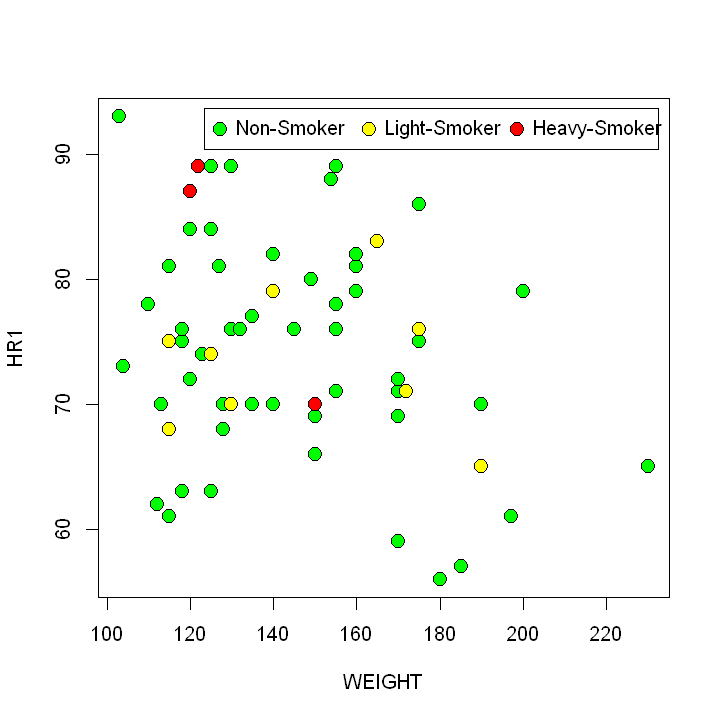

In [10]:
options(repr.plot.width=6, repr.plot.height=6)

colorIII<-c(rep('green',52), rep('yellow',9), rep('red',3)) 


plot(data[,c(2,1)], type='p', 
     pch=21, bg=colorIII, cex=1.5)
legend("topright", c('Non-Smoker', 'Light-Smoker', 'Heavy-Smoker'),
       horiz='TRUE', inset=0.02,
       pch=21, pt.bg=c('green', 'yellow', 'red'), pt.cex=1.5 )


In [11]:
HR1 <- data$HR1
WEIGHT <- data$WEIGHT

In [12]:
shapiro.test(HR1)
shapiro.test(WEIGHT)


	Shapiro-Wilk normality test

data:  HR1
W = 0.98585, p-value = 0.6758



	Shapiro-Wilk normality test

data:  WEIGHT
W = 0.94757, p-value = 0.008704


In [13]:
cor(data, method = "spearman")

,HR1,WEIGHT,smokenum
HR1,1.00000000,-0.14895354,0.04031126
WEIGHT,-0.14895354,1.00000000,-0.04117985
smokenum,0.04031126,-0.04117985,1.00000000


<font size=3 color='green'> If we don't take into account the effect of smoking, the two variables weight and heartrate appear to be negatively correlated (sample correlation of $-0.14$). Note, if we incorrectly used Pearson's method, we would have obtained a value of -0.24. Check for normality. 

In [14]:
pcor(data,  method = "spearman")

ERROR: Error in pcor(data, method = "spearman"): could not find function "pcor"


<font size=3 color='green'>     
The sample correlation between weight and heart rate when controlling for smoking is $-0.15$. We can thus conclude that there is a weak (possibly insignificant) negative correlation between weight and heart rate.

<font color='blue' size=5><b> Suggested solutions to Part 9 (datafile examanxiety) </b></font>

In [249]:
exam <- read.table(file="../Data/examanxiety.txt",sep=',',header = T) 
head(exam)

Code,Revise,Exam,Anxiety,Gender
<int>,<int>,<int>,<dbl>,<fct>
1,4,40,86.298,Male
2,11,65,88.716,Female
3,27,80,70.178,Male
4,53,80,61.312,Male
5,4,40,89.522,Male
6,22,70,60.506,Female


<font color='blue' size=3> Question: The file lists gender, time spent revising, exam performance and exam anxiety. Investigate the relationship
between exam performance and time spent revising; and the relationship that exists between
the variables when we statistically control for exam anxiety.</font>

In [251]:
exams <- select(exam,-c(Code,Gender))
head(exams)

Revise,Exam,Anxiety
<int>,<int>,<dbl>
4,40,86.298
11,65,88.716
27,80,70.178
53,80,61.312
4,40,89.522
22,70,60.506


In [252]:
time <- exams$Revise
grade <- exams$Exam

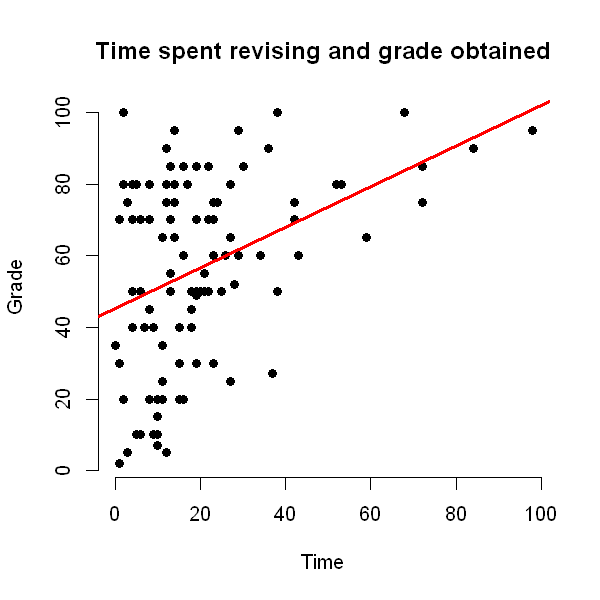

In [254]:
options(repr.plot.width=5, repr.plot.height=5)

plot(time, grade, main = "Time spent revising and grade obtained",
     xlab = "Time", ylab = "Grade",
     pch = 19, cex = 1, frame = FALSE)

plot(time, grade, main = "Time spent revising and grade obtained",
     xlab = "Time", ylab = "Grade",
     pch = 19, cex = 1, frame = FALSE)

abline(lm(grade ~ time, data = exams), col = "red", lwd=3)

In [257]:
shapiro.test(time)
shapiro.test(grade)


	Shapiro-Wilk normality test

data:  time
W = 0.80445, p-value = 2.252e-10



	Shapiro-Wilk normality test

data:  grade
W = 0.95516, p-value = 0.001522


In [262]:
cor(exams, method = "spearman")

,Revise,Exam,Anxiety
Revise,1.0000000,0.3498948,-0.6219694
Exam,0.3498948,1.0000000,-0.4046141
Anxiety,-0.6219694,-0.4046141,1.0000000


In [266]:
pcor(exams,  method = "spearman")

,Revise,Exam,Anxiety
Revise,1.0000000,0.1371872,-0.5607648
Exam,0.1371872,1.0000000,-0.2549132
Anxiety,-0.5607648,-0.2549132,1.0000000
,Revise,Exam,Anxiety
Revise,0.000000e+00,0.169144836,8.809754e-10
Exam,1.691448e-01,0.000000000,9.720058e-03
Anxiety,8.809754e-10,0.009720058,0.000000e+00
,Revise,Exam,Anxiety
Revise,0.000000,1.384966,-6.772725
Exam,1.384966,0.000000,-2.636223


<font size=3 color='green'>     
The sample correlation between revision time and grades when controlling for anxiety is $0.13$. We can thus conclude that there is a very weak (probably insignificant) positive correlation between time spent revising and grades.